In [119]:
import matplotlib.pyplot as plt
import numpy as np


In [120]:
largest_first_ada_balance = "lf/ada_balance.csv"
largest_first_utxos = "lf/utxo_count.csv"

thermostat_ada_balance = "th/ada_balance.csv"
thermostat_first_utxos = "th/utxo_count.csv"

In [121]:
def read_contents(path):
  data = []
  with open(path, "r") as f:
    data = f.readlines()
  data = data[1:]
  data = [[int(i) for i in item[:-1].split(',')] for item in data if len(item.strip()) > 0]
  return data

In [122]:
lf_ada_contents = read_contents(largest_first_ada_balance)
lf_utxos_contents = read_contents(largest_first_utxos)

In [123]:
th_ada_contents = read_contents(thermostat_ada_balance)
th_utxos_contents = read_contents(thermostat_first_utxos)

In [124]:
def plot_part(left, right):
  plt.figure(figsize=(12, 7))
  # computed actual

  xs = np.array([i[1] for i in lf_ada_contents])[left:right]
  assert([i[3] for num, i in enumerate(lf_ada_contents) if left <= num and num < right] == [i[3] for num, i in enumerate(th_ada_contents) if left <= num and num < right])
  plt.plot(xs, np.array([i[2] for num, i in enumerate(lf_ada_contents) if left <= num and num < right]) / 1000000, label="Largest first computed")
  plt.scatter(xs, np.array([i[2] for num, i in enumerate(lf_ada_contents) if left <= num and num < right]) / 1000000, label="Largest first points")

  plt.plot(xs, np.array([i[3] for num, i in enumerate(th_ada_contents) if left <= num and num < right]) / 1000000, label="Actual")
  plt.scatter(xs, np.array([i[3] for num, i in enumerate(th_ada_contents) if left <= num and num < right]) / 1000000, label="Actual points")

  plt.plot(xs, np.array([i[2] for num, i in enumerate(th_ada_contents) if left <= num and num < right]) / 1000000, label="Thermostat computed")
  plt.scatter(xs, np.array([i[2] for num, i in enumerate(th_ada_contents) if left <= num and num < right]) / 1000000, label="Thermostat points")

  plt.legend()
  plt.show();

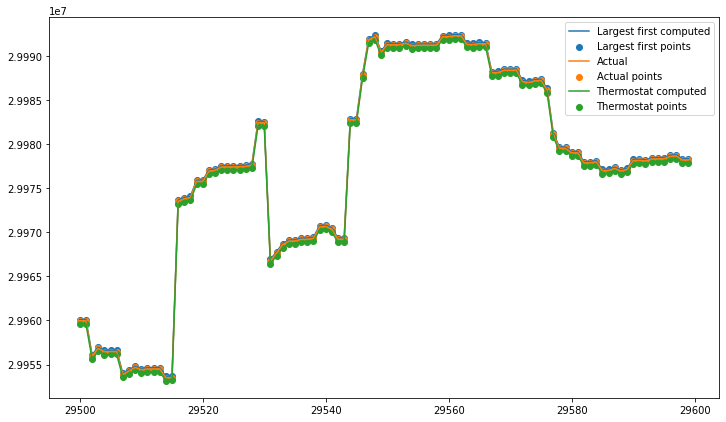

In [125]:
plot_part(29500, 29600)

In [126]:
def plot_part(left, right):
  plt.figure(figsize=(12, 7))
  # computed actual

  xs = np.array([i[1] for i in lf_ada_contents])[left:right]
  assert([i[3] for num, i in enumerate(lf_ada_contents) if left <= num and num < right] == [i[3] for num, i in enumerate(th_ada_contents) if left <= num and num < right])
  lf_points = np.array([i[2] for num, i in enumerate(lf_ada_contents) if left <= num and num < right]) / 1000000
  th_points = np.array([i[2] for num, i in enumerate(th_ada_contents) if left <= num and num < right]) / 1000000
  actual_points = np.array([i[3] for num, i in enumerate(th_ada_contents) if left <= num and num < right]) / 1000000

  plt.plot(xs, lf_points - actual_points, label="Largest first vs actual")

  plt.plot(xs, th_points - actual_points, label="Thermostat vs actual")
  plt.plot(xs, lf_points - th_points, label="Largest first vs thermostat")
  plt.title("Largest first and thermostat")
  plt.ylabel("Ada")
  plt.xlabel("# of transactions")
  plt.grid(":")

  plt.legend()
  plt.savefig("lf_vs_thermostat.jpg")
  plt.show();

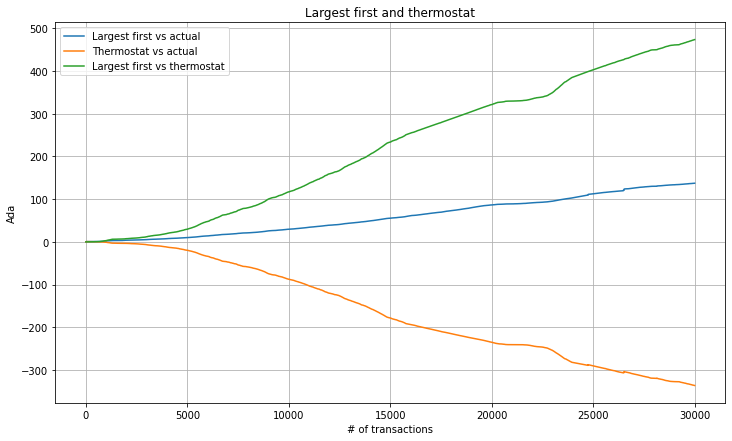

In [127]:
plot_part(0, 30000)

In [128]:
def plot_fees(left, right):
  plt.figure(figsize=(12, 7))
  # computed actual

  xs = np.array([i[1] for i in lf_ada_contents])[left:right]
  assert([i[5] for num, i in enumerate(lf_ada_contents) if left <= num and num < right] == [i[5] for num, i in enumerate(th_ada_contents) if left <= num and num < right])
  lf_points = np.array([i[4] for num, i in enumerate(lf_ada_contents) if left <= num and num < right]) / 1000000
  th_points = np.array([i[4] for num, i in enumerate(th_ada_contents) if left <= num and num < right]) / 1000000
  actual_points = np.array([i[5] for num, i in enumerate(th_ada_contents) if left <= num and num < right]) / 1000000

  plt.plot(xs, lf_points, label="Largest first")

  plt.plot(xs, actual_points, label="Actual")
  plt.plot(xs, th_points, label="Thermostat")
  plt.title("Largest first and thermostat: fees")
  plt.ylabel("Ada")
  plt.xlabel("# of transactions")
  plt.grid(":")

  plt.legend()
  plt.savefig("lf_vs_thermostat_feees.jpg")
  plt.show();

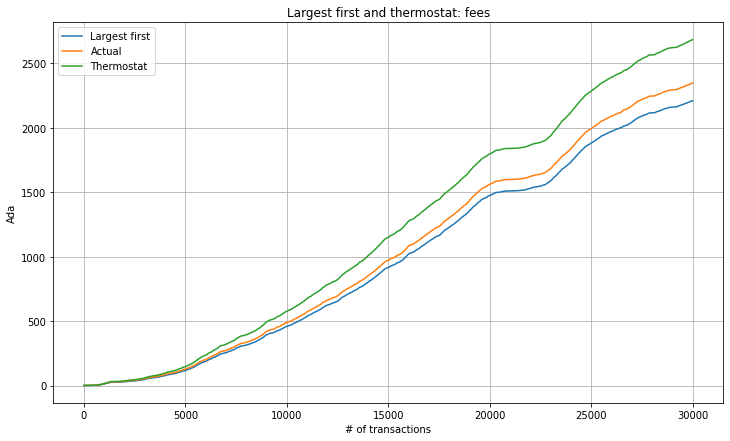

In [129]:
plot_fees(0,30000)

In [130]:
def plot_utxos(left, right):
  plt.figure(figsize=(12, 7))
  # computed actual

  xs = np.array([i[1] for i in lf_utxos_contents])[left:right]
  lf_points = np.array([i[2] for num, i in enumerate(lf_utxos_contents) if left <= num and num < right])
  th_points = np.array([i[2] for num, i in enumerate(th_utxos_contents) if left <= num and num < right])
  actual_points = np.array([i[5] for num, i in enumerate(th_ada_contents) if left <= num and num < right])

  plt.plot(xs, lf_points, label="Largest first")
  plt.plot(xs, th_points, label="Thermostat")

  plt.title("Largest first and thermostat: UTxOs")
  plt.ylabel("# of utxos")
  plt.xlabel("# of transactions")
  plt.grid(":")

  plt.legend()
  plt.savefig("lf_vs_thermostat_utxos.jpg")
  plt.show();

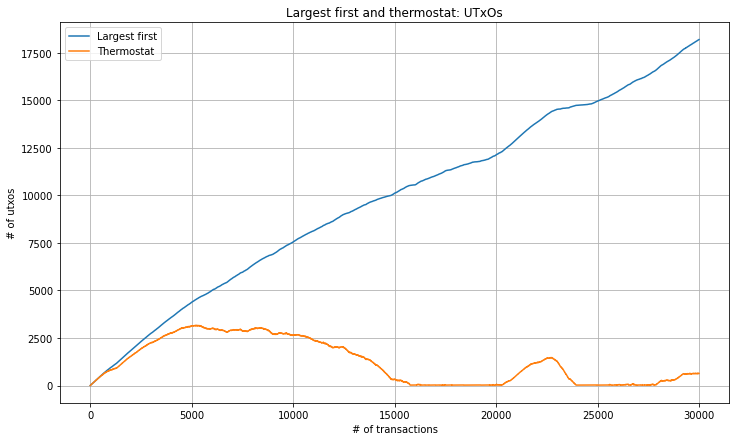

In [131]:
plot_utxos(0, 30000)